In [20]:
!pip install transformers evaluate accelerate

In [2]:
!pip install torch

In [7]:
# #avinepal account
# from google.colab import drive
# drive.mount('/content/drive')

In [8]:
# path = '/content/drive/MyDrive/dataset/news_setopati_preprocessed_1.csv'

In [21]:
import pandas as pd
import numpy as np

In [22]:
df = pd.read_csv('../data/news-setopati/news_setopati_preprocessed_1.csv')

In [23]:
small_df = df[0:2000]
small_df

,topic,date,title,body,link,source
0,politics,"शुक्रबार, मंसिर २९, २०८०",सर्वोच्चमा प्रस्तावित न्यायाधीश अब्दुल अजिज मु...,सर्वोच्च अदालतमा प्रस्तावित न्यायाधीश अब्दुल अ...,https://www.setopati.com/politics/318075,Setopati
1,politics,"शुक्रबार, मंसिर २९, २०८०",सर्वोच्चमा प्रस्तावित न्यायाधीश अब्दुल अजिज मु...,सर्वोच्च अदालतमा प्रस्तावित न्यायाधीश अब्दुल अ...,https://www.setopati.com/politics/318075,Setopati
2,politics,"शुक्रबार, मंसिर २९, २०८०","'अदालतले आदेश उल्ट्यायो, आत्मालोचना गर्नुहुन्न?'",सर्वोच्च अदालतका लागि प्रस्तावित न्यायाधीश सार...,https://www.setopati.com/politics/318066,Setopati
3,politics,"शुक्रबार, मंसिर २९, २०८०",संसदीय सुनुवाइ समितिमा सांसदहरूले नै राख्दैनन्...,सर्वोच्च अदालतका प्रधानन्यायाधीश न्यायाधीश संव...,https://www.setopati.com/politics/318072,Setopati
4,politics,"शुक्रबार, मंसिर २९, २०८०",'समुदायमा कांग्रेस' अभियान पुस १६ गतेदेखि सुरू...,नेपाली कांग्रेसले पुस गतेदेखि माघ गतेसम्म समुद...,https://www.setopati.com/politics/318070,Setopati
...,...,...,...,...,...,...
1995,politics,"आइतबार, भदौ १०, २०८०",संसदले आवश्यक संघीय कानून बनाउन सकेन: प्रकाशमा...,नेपाली कांग्रेसका नेता प्रकाशमान सिंहले संसदले...,https://www.setopati.com/politics/310298,Setopati
1996,politics,"आइतबार, भदौ १०, २०८०",ललिता निवास जग्गा प्रकरणमा किर्तेसम्बन्धी मुद्...,बालुवाटारस्थित प्रधानमन्त्री निवास वरिपरिको सर...,https://www.setopati.com/politics/310293,Setopati
1997,politics,"आइतबार, भदौ १०, २०८०",रास्वपा र राप्रपालाई एक-एक समिति दिने सत्ता गठ...,सत्ता गठबन्धनले राष्ट्रिय स्वतन्त्र पार्टी रास...,https://www.setopati.com/politics/310294,Setopati
1998,politics,"आइतबार, भदौ १०, २०८०",इन्जिनियरिङको शुल्क वृद्धि फिर्ता गर्न माग गर्...,इन्जिनियरिङ अध्ययनको शुल्क वुद्धि फिर्ता गर्न ...,https://www.setopati.com/politics/310289,Setopati


In [6]:
news_collection = list(small_df['body'])

In [9]:
import torch

In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [28]:
# device = torch.device('cpu')

In [13]:
device

device(type='cuda')

In [15]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [16]:
import tensorflow as tf

# Check for GPU availability
if tf.test.gpu_device_name():
    print('GPU found')
else:
    print('No GPU found')

GPU found


2024-02-11 22:37:57.872974: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-11 22:37:57.873650: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-11 22:37:57.873898: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [17]:
# from transformers import AutoTokenizer, AutoModel, AutoModelForMaskedLM
# import torch

# # Load the pre-trained NepBERTa tokenizer and model
# model_name = "NepBERTa/NepBERTa"
# tokenizer = AutoTokenizer.from_pretrained(model_name)
# model = AutoModel.from_pretrained(model_name,from_tf=True)
# model = AutoModelForMaskedLM.from_pretrained(model_name,from_tf=True)


2024-02-11 22:39:08.750332: W tensorflow/core/framework/op_kernel.cc:1827] UNKNOWN: JIT compilation failed.


UnknownError: Exception encountered when calling layer 'LayerNorm' (type LayerNormalization).

{{function_node __wrapped__Rsqrt_device_/job:localhost/replica:0/task:0/device:GPU:0}} JIT compilation failed. [Op:Rsqrt] name: 

Call arguments received by layer 'LayerNorm' (type LayerNormalization):
  • inputs=tf.Tensor(shape=(1, 2, 768), dtype=float32)

In [65]:
# # comment out this cell for now

# # Example Nepali sentence
# # nepali_sentence = ["म तिमीलाई माया गर्छु", "म तिमीलाई मन पराउँछु"]
# nepali_sentence = ["म तिमीलाई माया गर्छु", "हामी तपाईँलाई माया पर्छ"]
# # nepali_sentence = ["म तिमीलाई माया गर्छु", "नेपाल एउटा सुन्दर देश हो"]


# # Tokenize the input sentence
# tokens = tokenizer(nepali_sentence,truncation=True,padding=True, return_tensors="pt")

# # Forward pass to obtain hidden states
# with torch.no_grad():
#     outputs = model(**tokens)

# # Extract embeddings (e.g., using [CLS] token embedding)
# # embedding = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# # print("Sentence Embedding Shape:", embedding.shape)
# # print("Sentence Embedding:", embedding)


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [12]:
# outputs.last_hidden_state.shape

torch.Size([2, 7, 768])

In [13]:
# print(type(outputs.last_hidden_state))
# # print(outputs.shape)
# emb = outputs.last_hidden_state[:, 0, :].numpy()
# print(type(emb))
# print(emb.shape)

<class 'torch.Tensor'>
<class 'numpy.ndarray'>
(2, 768)


In [14]:
# # test
# from sklearn.preprocessing import normalize
# from sklearn.metrics.pairwise import cosine_similarity

# cls_embeddings = outputs.last_hidden_state[:, 0, :].numpy()

# # cls_embeddings = mp_emb
# print("CLS Token Embeddings Shape:", cls_embeddings.shape)
# print("CLS Token Embeddings:", cls_embeddings)

# # Calculate cosine similarity
# # cls_embeddings = normalize(cls_embeddings)
# similarity_matrix = cosine_similarity(cls_embeddings)

# # Extract the cosine similarity value from the matrix
# cosine_similarity_value = similarity_matrix[0, 1]

# print(f"Cosine Similarity: {cosine_similarity_value}")

CLS Token Embeddings Shape: (2, 768)
CLS Token Embeddings: [[ 0.00125795  0.4466689  -0.738687   ...  0.53622425  0.582567
  -0.83964616]
 [ 0.07956271  0.4681342  -0.31988126 ...  0.5031006   0.6940032
  -0.3808407 ]]
Cosine Similarity: 0.8374797105789185


In [ ]:
# encoding the whole news collection
import math

max_token_length = 512  # Set an appropriate maximum token length

batch_size = 64  # Adjust the batch size based on your available memory
all_embeddings = np.empty((0, 768))
loop_times = int(math.ceil(len(news_collection)/batch_size))
# print(loop_times)
for i in range(0, loop_times):
    if i==loop_times-1:
      batch = news_collection[i*batch_size:]
    else:
      batch = news_collection[i*batch_size:(i+1)*batch_size]
    print(f'Tokenization going on of {i*batch_size} entry')
    tokens = tokenizer(batch, truncation=True, padding=True, return_tensors="pt", max_length=max_token_length)

    # Forward pass to obtain hidden states
    with torch.no_grad():
        outputs = model(**tokens)

    embedding = outputs.last_hidden_state[:, 0, :].numpy()
    all_embeddings = np.append(all_embeddings, embedding, axis=0)




Tokenization going on of 0 entry
Tokenization going on of 64 entry
Tokenization going on of 128 entry
Tokenization going on of 192 entry
Tokenization going on of 256 entry
Tokenization going on of 320 entry
Tokenization going on of 384 entry
Tokenization going on of 448 entry
Tokenization going on of 512 entry
Tokenization going on of 576 entry
Tokenization going on of 640 entry
Tokenization going on of 704 entry


In [33]:
print(all_embeddings.shape)
print(all_embeddings[0])

(100, 768)
[-7.10314095e-01  1.86931193e-01 -2.46143028e-01  3.05633426e-01
  1.67291746e-01 -2.33265623e-01  3.06570143e-01  2.74869472e-01
 -8.84307846e-02 -1.52622133e-01 -1.03972352e+00  3.49202603e-01
  1.34536520e-01  4.27457541e-02  5.92743695e-01  1.62370026e-01
  1.69842988e-01 -5.20401239e-01 -2.88472533e-01 -2.00955302e-01
  2.05477312e-01  5.15998721e-01  3.42024863e-02  1.37897506e-01
  3.54360998e-01 -1.82610646e-01 -5.68903089e-01  3.03621113e-01
 -8.13113376e-02  2.00542912e-01  6.83917463e-01  2.88692355e-01
 -1.89943075e-01  3.52621198e-01 -9.58773494e-01 -2.22205698e-01
 -4.72469777e-01 -4.45552319e-02 -1.26483873e-01  3.51640731e-01
  2.58761972e-01 -3.46340925e-01  3.32010597e-01 -7.39851475e-01
 -5.48227690e-02  3.30895692e-01  2.68008430e-02  1.71500310e-01
  4.42552775e-01  3.52950454e-01 -4.54183705e-02  4.69121844e-01
  2.62158781e-01 -4.12136495e-01 -4.92263705e-01  4.04656023e-01
 -8.80257130e-01  3.14245313e-01  9.92869809e-02 -6.74686611e-01
 -3.29091516e-

In [34]:
!pip install umap-learn

In [35]:
import umap
umap_embeddings = umap.UMAP(n_neighbors=15,
                            n_components=5,
                            metric='cosine').fit_transform(all_embeddings)

In [37]:
!pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 48.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039289 sha256=f67f8acd43dd57b5b057674f644f21c863b0fd6648042b19ff5e4b1eff2fbcdd
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.8
    Uninstalling Cython-3.0.8:
      Successfully uninstalled Cython-3.0.8


In [38]:
print(umap_embeddings.shape)
print(type(umap_embeddings))

(100, 5)
<class 'numpy.ndarray'>


In [39]:
import hdbscan
cluster = hdbscan.HDBSCAN(min_cluster_size=15,
                          metric='euclidean',
                          cluster_selection_method='eom').fit(umap_embeddings)

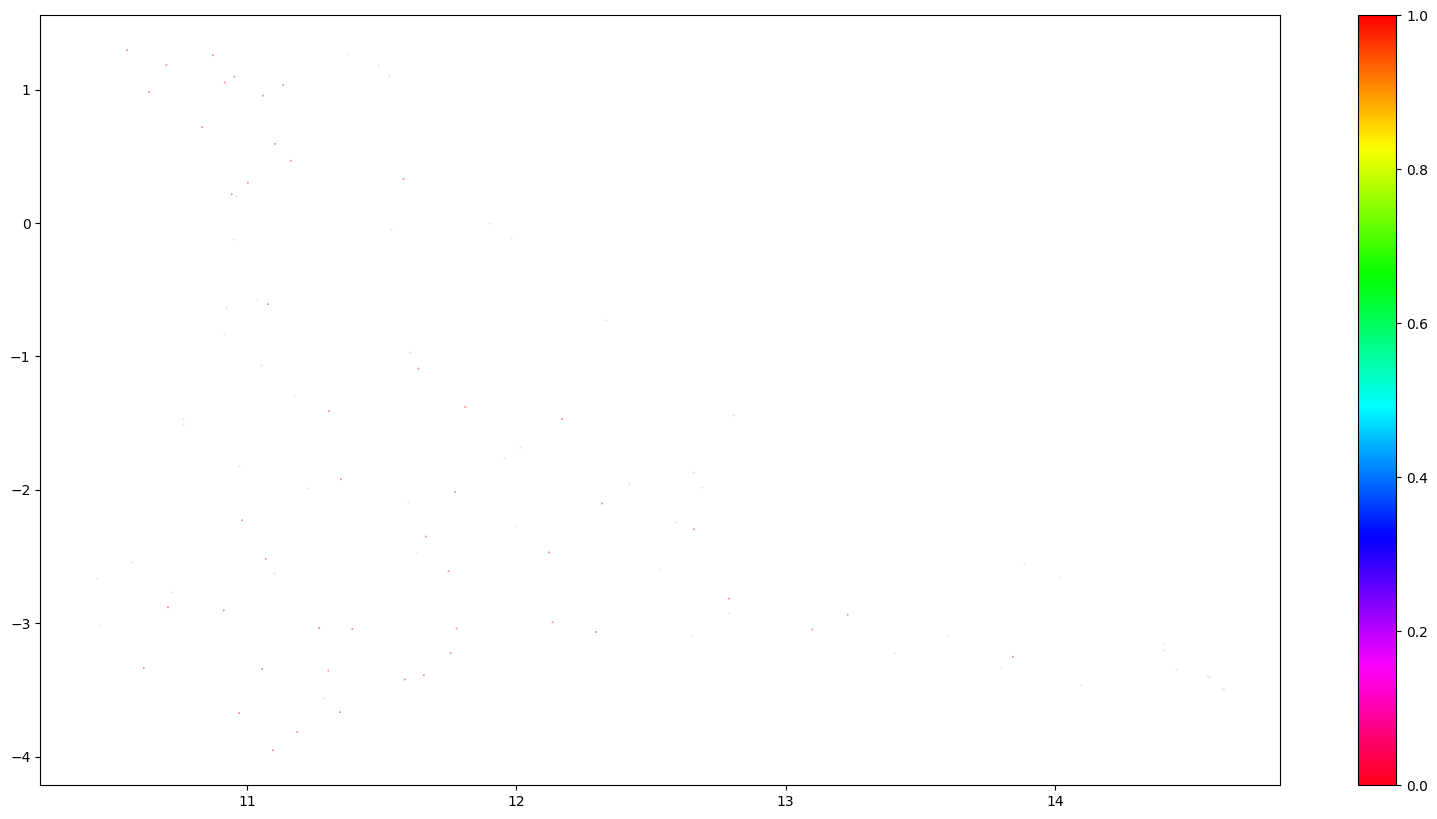

In [40]:
import matplotlib.pyplot as plt

# Prepare data
umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(all_embeddings)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = cluster.labels_

# Visualize clusters
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv_r')
plt.colorbar()

In [41]:
docs_df = pd.DataFrame(data, columns=["Doc"])
docs_df['Topic'] = cluster.labels_
docs_df['Doc_ID'] = range(len(docs_df))
docs_per_topic = docs_df.groupby(['Topic'], as_index = False).agg({'Doc': ' '.join})

NameError: name 'data' is not defined

In [44]:
cluster.labels_

array([ 1,  1,  1, -1, -1,  1,  0,  1, -1,  1,  1, -1,  0,  0,  0,  1,  1,
       -1, -1, -1, -1,  1, -1,  0,  1,  1, -1,  0, -1, -1,  1, -1,  1, -1,
        1, -1,  1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1, -1,  0,  1,
        1, -1,  0, -1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  0,
       -1, -1, -1,  1, -1,  0,  1, -1,  1,  1, -1,  1,  1,  1,  0,  1,  1,
       -1, -1,  0,  0, -1,  1, -1,  0, -1, -1, -1, -1, -1, -1,  0])

In [45]:
# test part of sklearn data

from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups(subset='all')['data']

In [55]:
len(data)

18846

In [48]:
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 2.5 MB/s eta 0:00:00


In [49]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
embeddings = model.encode(data, show_progress_bar=True)

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/550 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/265M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/450 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/589 [00:00<?, ?it/s]

In [56]:
print(type(embeddings))
print(embeddings.shape)

<class 'numpy.ndarray'>
(18846, 768)


In [50]:
import umap
umap_embeddings = umap.UMAP(n_neighbors=15,
                            n_components=5,
                            metric='cosine').fit_transform(embeddings)

In [57]:
umap_embeddings.shape

(18846, 5)

In [51]:
import hdbscan
cluster = hdbscan.HDBSCAN(min_cluster_size=15,
                          metric='euclidean',
                          cluster_selection_method='eom').fit(umap_embeddings)

In [61]:
print(cluster.labels_)

[-1 86  3 ... -1 -1 86]


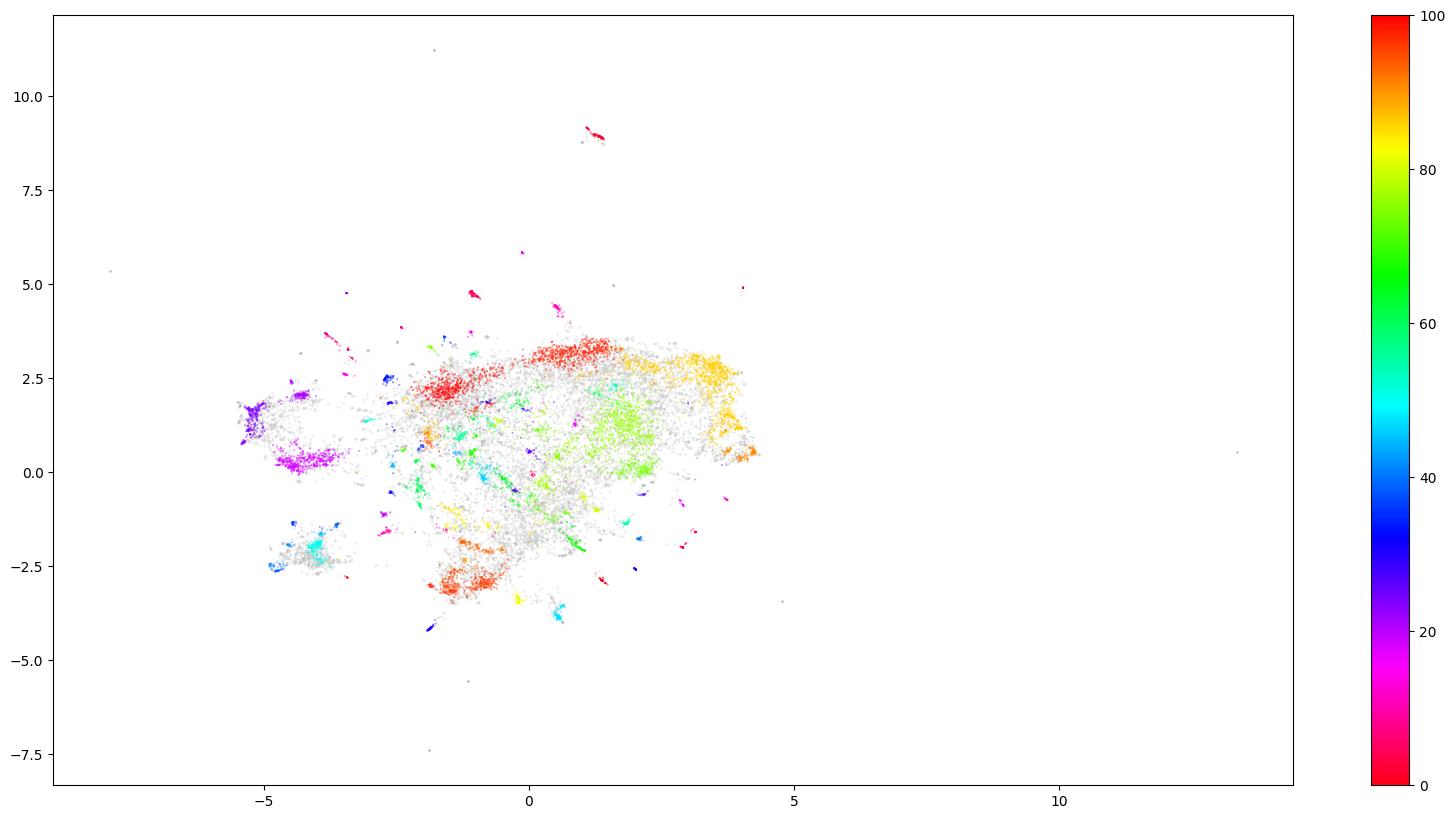

In [52]:
import matplotlib.pyplot as plt

# Prepare data
umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = cluster.labels_

# Visualize clusters
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv_r')
plt.colorbar()

(18846, 768)